# Check the assumptions of OLS
* If the errors are normally distributed (top)
* If the expected values of erros are $0$ (middle)
* If the errors have the same variance (bottom)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns; sns.set()
import scipy.stats as stats

from set_path import *

In [29]:
class residue:
    def __init__(self, inputresid,inputpep,inputpat,inputypred,var,output1,outputresid):
        self.inputypred=inputypred
        self.inputresid=inputresid
        self.inputpep=inputpep
        self.inputpat=inputpat
        self.output1=output1
        self.outputresid=outputresid
        self.var=var
    def read_resid(self):
        
        self.dfresid=pd.read_csv(self.inputresid,index_col=0)      
#         print (self.dfresid.shape)
#         print (self.dfresid.head())
    def errors_distribution(self,idx=0):
        """The errors are normally distributed"""
#         idx=self.dfresid.columns.index([idx])
#         print (self.dfresid.columns.tolist())

        X=self.dfresid.iloc[:,idx]
        st, p= stats.normaltest(X)
        fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
        fig.subplots_adjust(wspace=0.25)
        plt.suptitle('Distribution of residues in model '+self.dfresid.columns[idx]+
                     '\n $P_{norm}$='+'{0:0.3g}'.format(p))
        sns.distplot(X,ax=ax0)
        stats.probplot(X, dist="norm",plot=plt)

    def read_ypred_pep(self):
        self.dfypred=pd.read_csv(self.inputypred,index_col=0)
        self.dfpep=pd.read_csv(self.inputpep,index_col=0)
    def errors_0(self,idx):
        """The expected value of the errors is 0
        1. plot residues vs predictions
        2. plot residues vs independent variables (peptide)
        """
        fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
        fig.subplots_adjust(wspace=0.25)
        ax[0].scatter(x=self.dfypred.iloc[:,idx],
                    y=self.dfresid.iloc[:,idx])
        ax[0].set_title("residues vs fitted")
        ax[0].set_ylabel("residues")
        ax[0].set_xlabel("fitted values\n lm(eGFR~ {}+ age + sex + CVD + diabetes)"\
                   .format(self.dfresid.columns[idx]))
        
        
        ax[1].scatter(x=self.dfpep.iloc[:,idx],
                    y=self.dfresid.iloc[:,idx])
        ax[1].set_title("residues vs peptide intensity")
        ax[1].set_ylabel("residues")
        ax[1].set_xlabel(self.dfresid.columns[idx])
    def variance_homogeneity(self,idx=0):
        """all errors have the same variance(homoskedasticity)
        should give a flat line
        """
        fig, ax= plt.subplots(1)#,figsize=(5,5))
#         fig.subplots_adjust(wspace=0.25)
        ax.scatter(x=self.dfypred.iloc[:,idx],
                    y=np.sqrt(abs(self.dfresid.iloc[:,idx])))
        ax.set_ylabel("sqrt(residues)")
        ax.set_xlabel("fitted values\n lm(eGFR~ {}+ age + sex + CVD + diabetes)"\
                   .format(self.dfresid.columns[idx]))
        
    def read_pateints(self):
        self.dfpat=pd.read_csv(self.inputpat,index_col=0)[self.var]
        self.dfresid=self.dfresid.join(self.dfpat)  
    
   


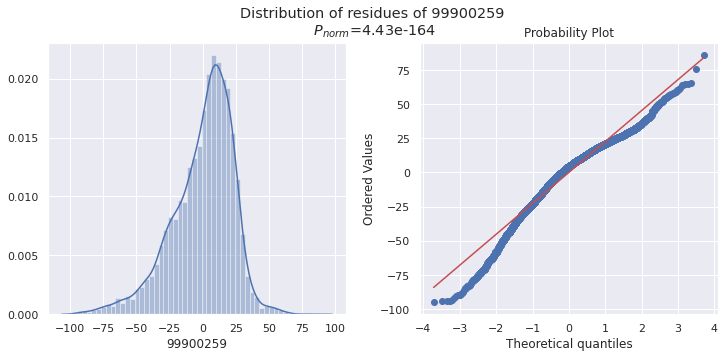

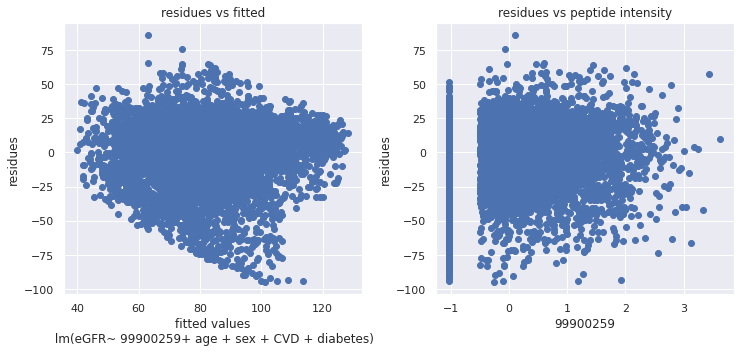

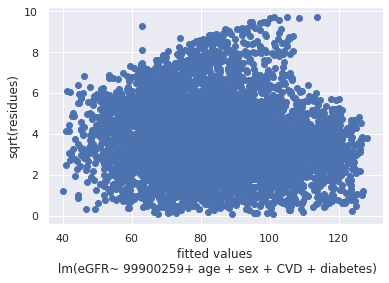

In [28]:
x1=residue(inputresid=f2+'all_ols_resid.csv',
      inputpat=f2+'Tianlin_GFR_CKD_EPI_cleaned_20201005.csv',
      inputpep=f2+'reduced_all_pivot.csv',
      inputypred=f2+'all_ols_ypred.csv',
      var=['gender', 
           'Age', 
           'Diabetes/Obesity/metabolic syndrome',
           'CVD/Hypertension',
           'GFR_CKD_EPI', ],
      output1=f2+'all_ols_results.csv',
     outputresid=f2+'all_ols_resid.csv')
x1.read_resid()
x1.errors_distribution(0)
x1.read_ypred_pep()
x1.errors_0(0)
x1.variance_homogeneity(0)